## Technocolabs Mini Project: Bigmart Sales Dataset
### Author : Mohammed Ahmed Abdulbaqui

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ5giJqwHM3QPu5r6wyYq-J6OIVmmU2Z-Bs1g&usqp=CAU)

## Table of Contents
1. Introduction
2. Data Id
3. Data Exploration
4. Preprocessing and Data Analysis
5. Univariate Analysis
6. Bivariate Analysis
7. MultiVariant
8. Data Cleaning
9. Feature Engineering
10. Classifier For Handle Categorical outliers
11. Model Tranning
12. SalesAnalysisReport and Hypothesis Answring  

# Introducion

### Problem Statement:
The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.

### Breakdown of the Problem Statement:
* Supervised machine learning problem.
* The target value will be `Item_Outlet_Sales`.

### Aim of the NoteBook:
The objective is to create a model that can predict the sales per product for each store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


# Data Id 

This dataset is named [BigMart Sales]. The dataset contains a set of **8,523 records** under **12 attributes**:


| Column Name                         | Description                                                    |
|------------------                   |----------------------------------------------------------------|
| `Item_Identifier`                   | Unique product ID                                              |
| `Item_Weight`                       | Weight of product                                              |
| `Item_Fat_Content`                  | Checks the Concentration of fat in the product                 |
| `Item_Visibility`                   | The % of total display area of all similar products in a store |
| `Item_Type`                         | Product Category                                               |
| `Item_MRP`                          | Maximum Retail Price for a Product                             |
| `Outlet_Identifier`                 | Store ID                                                       |
| `Outlet_Establishment_Year`         | The year in which store was established                        |
| `Outlet_Size`                       | The size of the store (Area Size Category)                     |
| `Outlet_Location_Type`              | In Terms of city Tiers (Size)                                  |
| `Outlet_Type`                       | Grocery store or a type of    supermarket                      |
| `Item_Outlet_Sales`                 | Sales of the product In the Specific outlet                    |

## Loading Packages and Data

In [1]:
# Data Manipulation
import pandas as pd 
import numpy as np 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warning Handling
import warnings
from sklearn.model_selection import cross_val_predict

# Machine Learning and Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from helper import *
from scipy.stats import skew
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# Plotting Style
sns.set_theme(style="darkgrid")

# Ignore Warnings
warnings.filterwarnings("ignore")

# Display Plots Inline
%matplotlib inline

#saving and loading models

import joblib
import json

In [2]:
#path for the training set
tr_path = "./9961_14084_bundle_archive/Train.csv"
#path for the testing set
te_path = "./9961_14084_bundle_archive/Test.csv"

In [3]:
tr_df = pd.read_csv(tr_path)
te_df = pd.read_csv(te_path)
target_column = "Item_Outlet_Sales"

## First look at the data:

In [4]:
tr_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


*Size* of each data set:

In [5]:
print(f"training set (row, col): {tr_df.shape}\ntesting set (row, col): {te_df.shape}")

training set (row, col): (8523, 12)
testing set (row, col): (5681, 11)


# Data Exploration


In [6]:
te_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
tr_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
te_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
tr_df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [11]:
te_df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,DRF48,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


*Duplicated* in each data set:

In [12]:
print(f"training set duplicated: {tr_df.duplicated().sum()}\ntesting set duplicated: {te_df.duplicated().sum()}")

training set duplicated: 0
testing set duplicated: 0


## Data has missing values as some stores do not report all the data due to technical glitches.🚫

In [13]:
null_columns(tr_df)
null_columns(te_df)

nulls: 
Item_Weight:17.17%
Outlet_Size:28.28%
nulls: 
Item_Weight:17.18%
Outlet_Size:28.27%


| column           | size |
|------------------|------|
| `Outlet_Size`    | 28%  |
| `Item_Weight`    | 17%  |

# Preprocessing and Data Analysis
## Numerical  Continuous Columns

- Item_Weight
- Item_Visibility
- Item_MRP
- Item_Outlet_Sales

## Categorical Columns

- Item_Fat_Content
- Item_Type
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type
- Outlet_Establishment_Year


In [14]:
numerical_columns = ["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]
categorical_columns = ["Item_Fat_Content","Item_Type","Outlet_Location_Type","Outlet_Type","Outlet_Establishment_Year","Outlet_Size"]
tr_df[categorical_columns[:-1] ]= tr_df[categorical_columns[:-1]].astype('category')

In [15]:
for i in categorical_columns:
    print(tr_df[i].unique())
    print("="*50)

['Low Fat', 'Regular', 'low fat', 'LF', 'reg']
Categories (5, object): ['LF', 'Low Fat', 'Regular', 'low fat', 'reg']
['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', ..., 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']
Length: 16
Categories (16, object): ['Baking Goods', 'Breads', 'Breakfast', 'Canned', ..., 'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods']
['Tier 1', 'Tier 3', 'Tier 2']
Categories (3, object): ['Tier 1', 'Tier 2', 'Tier 3']
['Supermarket Type1', 'Supermarket Type2', 'Grocery Store', 'Supermarket Type3']
Categories (4, object): ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
[1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004]
Categories (9, int64): [1985, 1987, 1997, 1998, ..., 2002, 2004, 2007, 2009]
['Medium' nan 'High' 'Small']


## OutLiers 
1. Item_Visibility
2. Item_Outlet_Sales

In [16]:
tr_outliers , indexs   = outliers_detection_percent(columns=numerical_columns,df=tr_df)

0.03871876099964801


In [17]:
tr_outliers

{'Item_Visibility': array([  49,   83,  108,  174,  334,  434,  502,  521,  532,  680,  847,
         854,  966, 1159, 1225, 1272, 1291, 1311, 1324, 1434, 1496, 1501,
        1560, 1575, 1644, 1651, 1754, 1805, 1827, 1841, 1941, 2081, 2088,
        2122, 2177, 2251, 2324, 2336, 2401, 2403, 2439, 2445, 2586, 2613,
        2728, 2855, 2895, 3001, 3017, 3171, 3206, 3336, 3341, 3399, 3458,
        3474, 3488, 3497, 3540, 3750, 3767, 3811, 3884, 3993, 4006, 4175,
        4192, 4219, 4350, 4382, 4408, 4530, 4538, 4567, 4656, 4674, 4789,
        4941, 4987, 5031, 5050, 5057, 5083, 5150, 5154, 5287, 5354, 5366,
        5374, 5445, 5634, 5732, 5734, 5784, 5795, 5837, 5880, 5891, 5946,
        6008, 6012, 6102, 6179, 6536, 6547, 6576, 6622, 6647, 6670, 6674,
        6786, 6833, 6903, 6909, 6926, 6953, 6966, 7005, 7030, 7072, 7081,
        7088, 7107, 7121, 7215, 7250, 7278, 7368, 7388, 7499, 7558, 7603,
        7639, 7744, 7866, 7949, 8194, 8215, 8273, 8292, 8345, 8371, 8432,
        8509]),
 'I

In [18]:
tr_df.drop(indexs , inplace = True )

# Univariate analysis

## Exploring the distribution of numerical data 

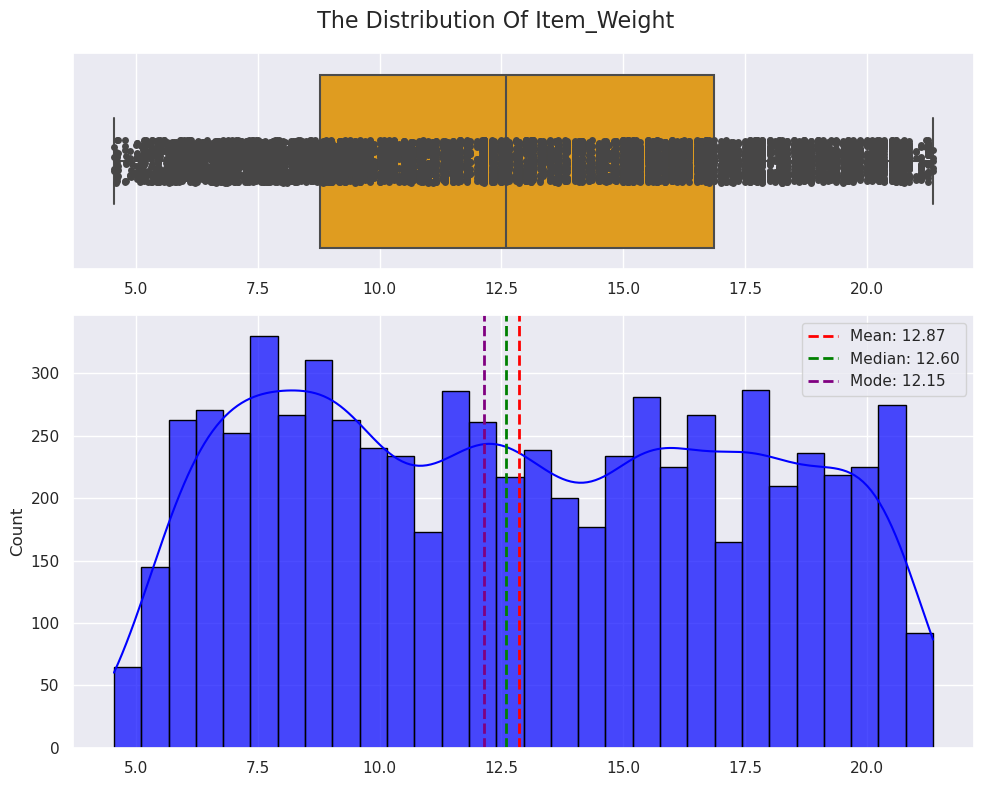

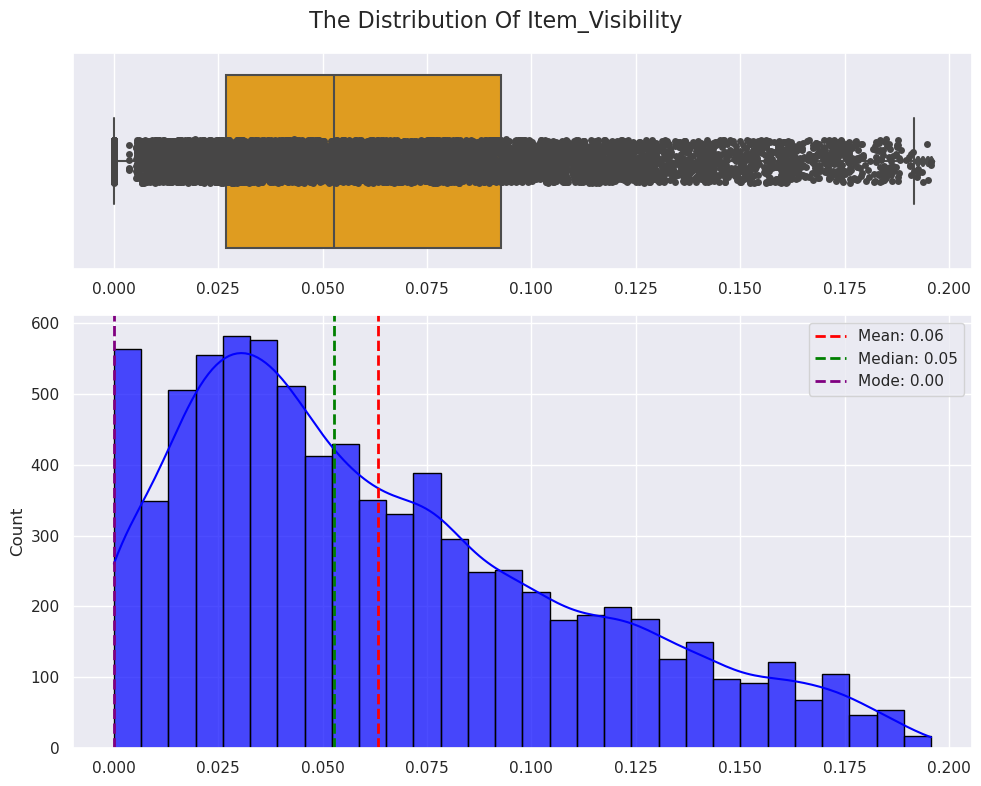

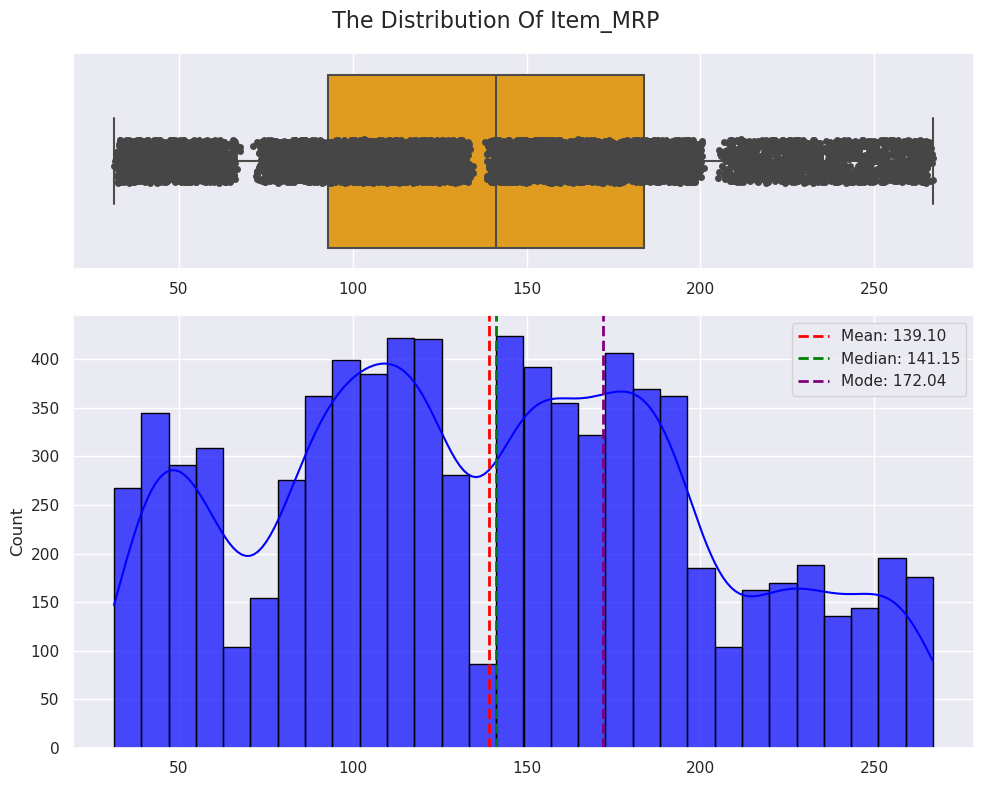

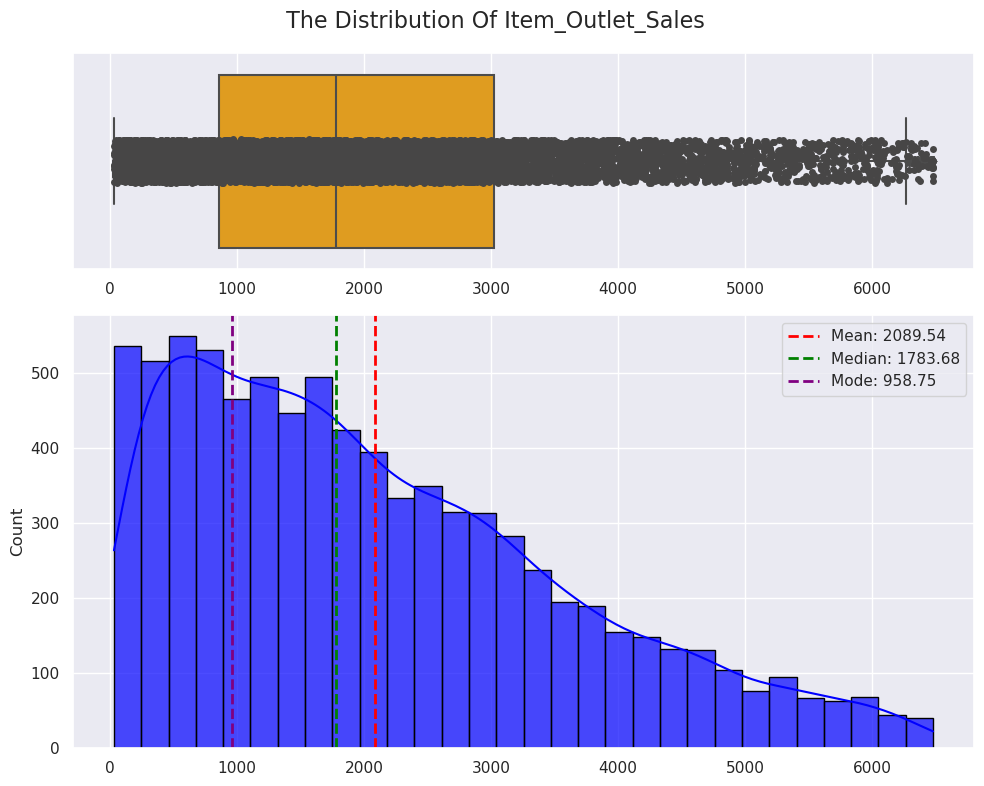

In [19]:
for i in numerical_columns:
    dist_plot(tr_df[i])

##  Categorical Univariate Analysis

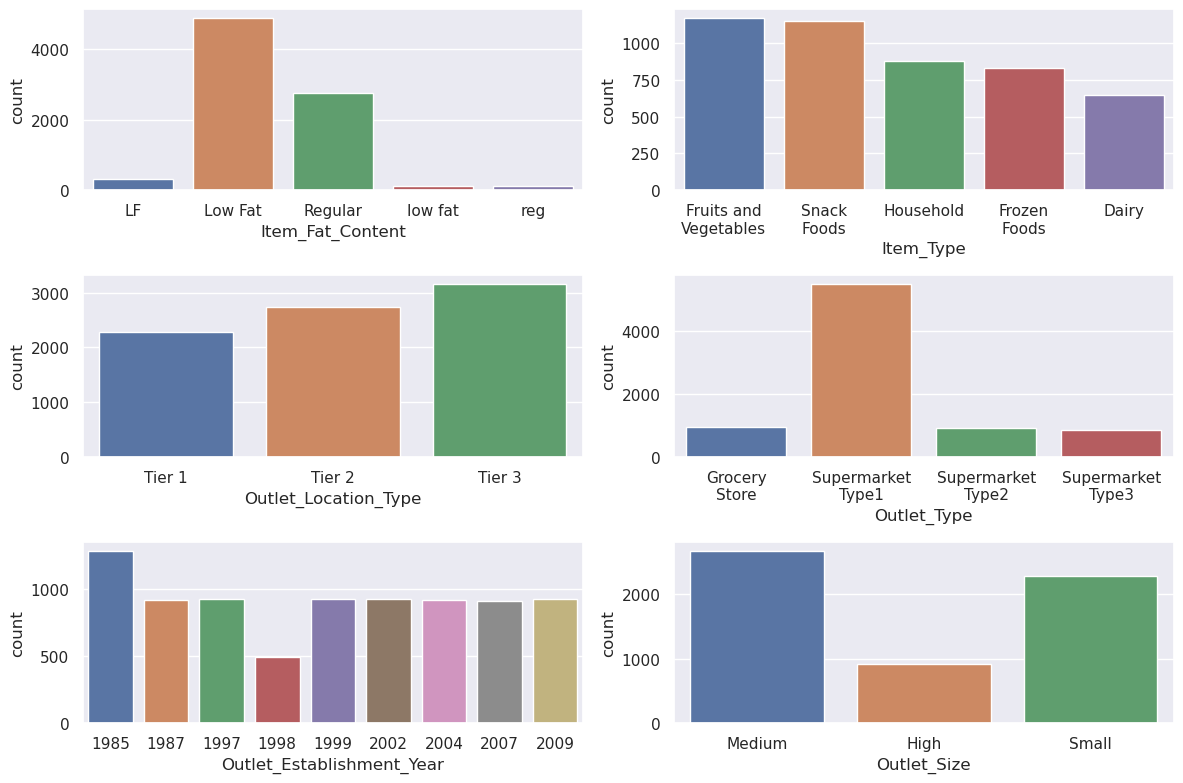

In [20]:
def fun(data,column_name,ax):
    if len(data[column_name].unique()) > 10:
        sns.countplot(x=data[column_name],ax=ax, order=data[column_name].value_counts().index[:5])
    else:
        sns.countplot(x=data[column_name],ax=ax)
subplot(num_columns=2, width=12, height=8, data=tr_df, fun=fun, columns=categorical_columns,wrap=True)

In [21]:
most_frequent_items = {column: tr_df[column].value_counts().idxmax() for column in categorical_columns}

for column, value in most_frequent_items.items():
    print(f"The most frequent value in {column} is: {value}")

The most frequent value in Item_Fat_Content is: Low Fat
The most frequent value in Item_Type is: Fruits and Vegetables
The most frequent value in Outlet_Location_Type is: Tier 3
The most frequent value in Outlet_Type is: Supermarket Type1
The most frequent value in Outlet_Establishment_Year is: 1985
The most frequent value in Outlet_Size is: Medium


In [22]:
tr_df["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    1175
Snack Foods              1154
Household                 877
Frozen Foods              830
Dairy                     649
Canned                    626
Baking Goods              622
Health and Hygiene        507
Soft Drinks               428
Meat                      409
Breads                    242
Hard Drinks               207
Others                    167
Starchy Foods             139
Breakfast                 101
Seafood                    60
Name: count, dtype: int64

In [23]:
tr_df["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    1175
Snack Foods              1154
Household                 877
Frozen Foods              830
Dairy                     649
Canned                    626
Baking Goods              622
Health and Hygiene        507
Soft Drinks               428
Meat                      409
Breads                    242
Hard Drinks               207
Others                    167
Starchy Foods             139
Breakfast                 101
Seafood                    60
Name: count, dtype: int64

# BIvariate Analysis

## Sales per Category 

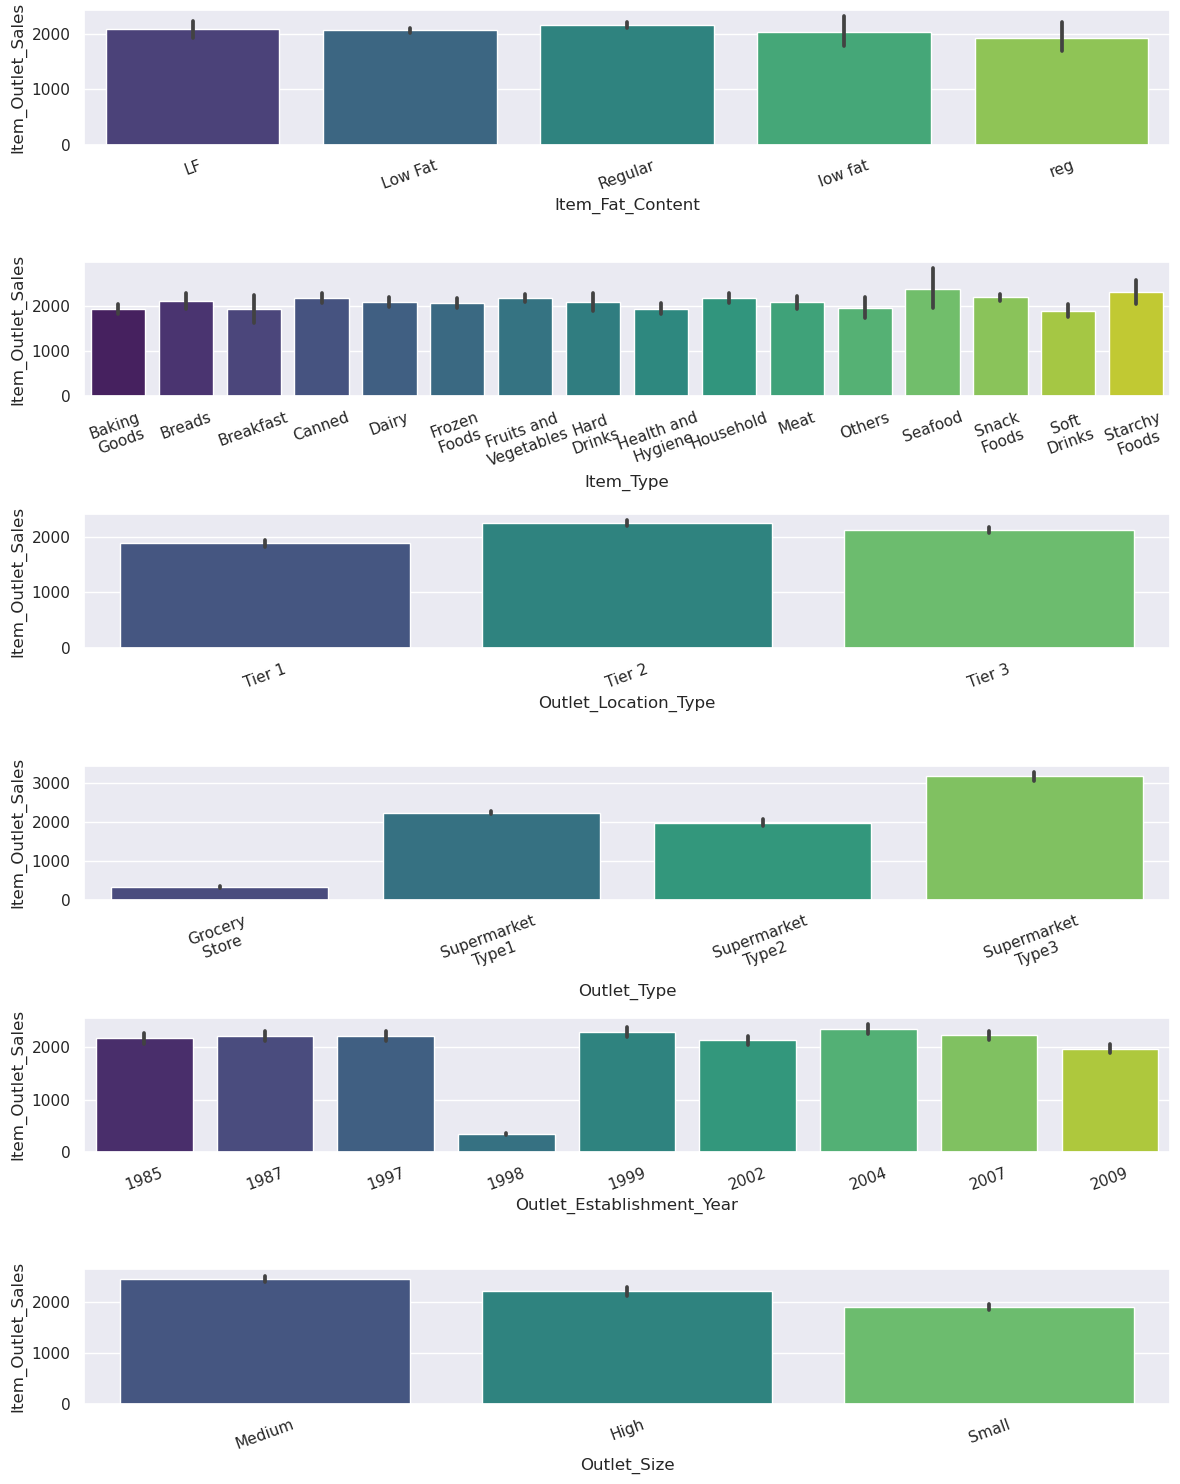

In [24]:
def custom(data, column, ax, **kwargs):
    sns.barplot(x=data[column], y=data["Item_Outlet_Sales"], palette='viridis',ax=ax)

subplot(num_columns=1, width=12, height=15, data=tr_df, columns=categorical_columns,fun=custom, wrap=True,rot=20)

In [25]:
max_items = {column: tr_df.dropna()[column].idxmax() for column in numerical_columns}

for column, index in max_items.items():
    print(f"The item with the maximum {column} is: { tr_df.loc[index, 'Item_Identifier'] }")
    print(tr_df.loc[index])
    print("\n")


The item with the maximum Item_Weight is: FDC02
Item_Identifier                          FDC02
Item_Weight                              21.35
Item_Fat_Content                       Low Fat
Item_Visibility                       0.068809
Item_Type                               Canned
Item_MRP                              258.5278
Outlet_Identifier                       OUT035
Outlet_Establishment_Year                 2004
Outlet_Size                              Small
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                     5206.556
Name: 2368, dtype: object


The item with the maximum Item_Visibility is: FDU13
Item_Identifier                          FDU13
Item_Weight                              8.355
Item_Fat_Content                       Low Fat
Item_Visibility                       0.188323
Item_Type                               Canned
Item_MRP                              148.5418
Outlet_Identifier         

Item_Identifier
FDA15    41584.5364
FDF05    36555.7490
FDA04    35741.4756
FDD29    32469.7344
FDF04    30224.6568
FDX31    29679.3666
FDQ39    29235.9438
NCY18    29067.4964
FDG09    28538.8512
NCQ06    28050.1540
Name: Item_Outlet_Sales, dtype: float64


<Axes: xlabel='Item_Identifier'>

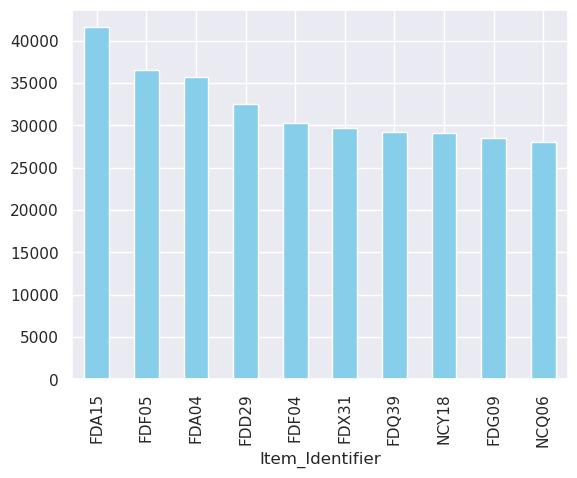

In [26]:
top_10_items=tr_df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(10)
print(top_10_items)
top_10_items.plot(kind='bar', color='skyblue')

# Multivariate Analysis

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.008306,0.028317,0.012499
Item_Visibility,-0.008306,1.000000,0.001426,-0.071907
Item_MRP,0.028317,0.001426,1.000000,0.564361
Item_Outlet_Sales,0.012499,-0.071907,0.564361,1.000000


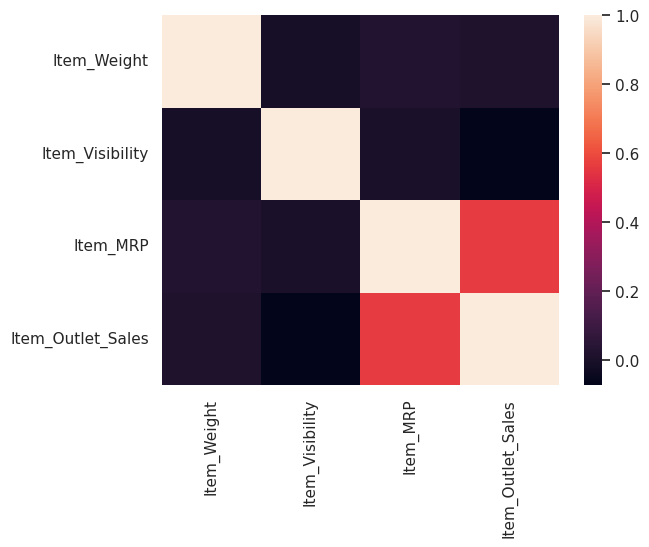

In [27]:
corr = tr_df[numerical_columns].corr()
sns.heatmap(corr)
corr

# Data Cleaning 

## Handel Item Item_Fat_Content


In [28]:
fat_content_mapping = {'LF': 'Low Fat', 
                       'low fat': 'Low Fat', 
                       'reg': 'Regular'}

tr_df['Item_Fat_Content'] = tr_df['Item_Fat_Content'].map(fat_content_mapping).fillna(tr_df['Item_Fat_Content'])

te_df['Item_Fat_Content'] = te_df['Item_Fat_Content'].map(fat_content_mapping).fillna(te_df['Item_Fat_Content'])

tr_df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5309
Regular    2884
Name: count, dtype: int64

## Handel Lowest Frequent  Categroies  

In [29]:
def map_to_group(item_type):
    if item_type in ['Dairy', 'Baking Goods', 'Snack Foods', 'Breakfast', 'Canned', 'Breads', 'Starchy Foods']:
        return 'Grocery'
        
    elif item_type in ['Soft Drinks', 'Hard Drinks']:
        return 'Beverages'
        
    elif item_type in ['Meat', 'Seafood']:
        return 'Proteins'
        
    elif item_type in ['Household', 'Health and Hygiene']:
        return 'Household and Non-Food Items'
    else :
        return item_type

tr_df['Item_Type'] = tr_df['Item_Type'].apply(map_to_group)
te_df['Item_Type'] = te_df['Item_Type'].apply(map_to_group)

## Handel Nulls 

## Fill numrical Data using KNNImputer

In [30]:
from sklearn.impute import KNNImputer


knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer2 = KNNImputer(n_neighbors=5)


tr_df[numerical_columns] = knn_imputer.fit_transform(tr_df[numerical_columns])
te_df[numerical_columns[:-2]] = knn_imputer.fit_transform(te_df[numerical_columns[:-2]])


# Fetaure Engineering

## Extract Outlet Age from Outlet_Establishment_Year

In [31]:
numerical_columns.append(categorical_columns[-2])
del categorical_columns[-2]
tr_df["Outlet_Establishment_Year"] = tr_df["Outlet_Establishment_Year"].astype(int)


In [32]:
tr_df["Outlet_Age"] = tr_df["Outlet_Establishment_Year"].max()-tr_df["Outlet_Establishment_Year"]
te_df["Outlet_Age"] = te_df["Outlet_Establishment_Year"].max()-te_df["Outlet_Establishment_Year"]


# Data preparation 

In [33]:
te_df.drop(["Item_Identifier","Outlet_Establishment_Year"],inplace = True ,axis=1 )
tr_df.drop(["Item_Identifier","Outlet_Establishment_Year"],inplace = True ,axis=1 )

# Classfier For handel Outlet_Size Missing Values

## Preparation for Null Filling 
1. split train and test
2. encode the data using Column Transformer 

### Note on `preprocess_data_for_nulls` Function

In the `preprocess_data_for_nulls` function, the last parameter excludes `Item_Outlet_Sales` for Train Data Set (0 remove Item_Outlet_Sales). 

In [34]:
target_column = "Outlet_Size"
preprocessor, X_train, y_train, df_predict = preprocess_data_for_nulls(tr_df, target_column,1)
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Item_Outlet_Sales', 'Outlet_Age']),
                                ('cat', OrdinalEncoder(),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Type'])])

In [35]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier() )
])

pipeline.fit(X_train, y_train)
 
# train 
predicted = pipeline.predict(df_predict.drop([target_column], axis=1))
tr_df.loc[tr_df[target_column].isnull(), target_column] = predicted

In [36]:
df_predict

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,11
8,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,NaN,Tier 2,Supermarket Type1,1076.5986,7
9,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,NaN,Tier 2,Supermarket Type1,4710.5350,2
25,13.000,Low Fat,0.099887,Household and Non-Food Items,45.9060,OUT017,NaN,Tier 2,Supermarket Type1,838.9080,2
28,5.925,Regular,0.161467,Grocery,45.5086,OUT010,NaN,Tier 3,Grocery Store,178.4344,11
...,...,...,...,...,...,...,...,...,...,...,...
8501,5.340,Regular,0.005998,Grocery,100.4358,OUT017,NaN,Tier 2,Supermarket Type1,1508.0370,2
8502,8.420,Low Fat,0.070712,Household and Non-Food Items,216.4192,OUT045,NaN,Tier 2,Supermarket Type1,3020.0688,7
8508,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,NaN,Tier 2,Supermarket Type1,2587.9646,7
8514,15.000,Regular,0.054489,Grocery,57.5904,OUT045,NaN,Tier 2,Supermarket Type1,468.7232,7


In [37]:
preprocessor, X_train, y_train, df_predict = preprocess_data_for_nulls(te_df, target_column,0) 

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier() )
])

pipeline.fit(X_train, y_train)
 

predicted = pipeline.predict(df_predict.drop([target_column], axis=1))
te_df.loc[te_df[target_column].isnull(), target_column] = predicted

In [38]:
# Save the preprocessor and the trained model
joblib.dump(preprocessor, './Model_and_Parameters/preprocessor.joblib')
joblib.dump(pipeline, './Model_and_Parameters/trained_model_For_test_DataSet.joblib')

['./Model_and_Parameters/trained_model_For_test_DataSet.joblib']

In [39]:
tr_df.to_csv("./prepared_Data/prepared_data.csv",index=False)

In [40]:
te_df.to_csv("./prepared_Data/prepared_data_test.csv",index=False)

# Model Traning 

First of all we will divide our dataset into two variables `X` as the features we defined earlier and `y` as the `	Item_Outlet_Sales` the target value we want to predict.

**Assumptions:**

* This is a regression problem so we will use Regression methods.

* Train test split will be a 8:2 ratio respectively.

## Models we will use:

* **Gradient Boosting Regressor**
* **Random Forest Regressor**
* **XGBoost Regressor**

## The Process of Modeling the Data:

1. Importing the model

2. Fitting the model

3. Predicting Item Outlet Sales

4. Regression metrics


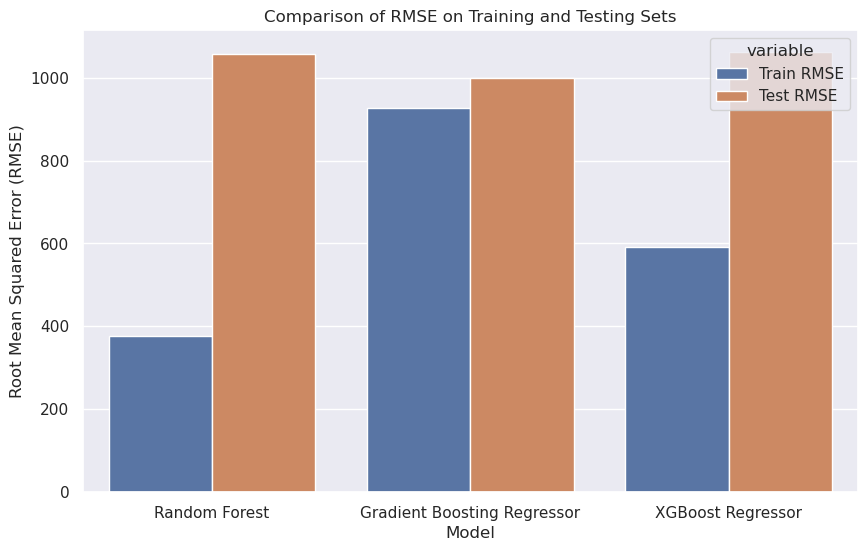

{'model': GradientBoostingRegressor(),
 'train_mse': 856497.33101,
 'train_rmse': 925.4714101526854,
 'train_r2': 0.6166620921248135,
 'test_mse': 996140.8130644718,
 'test_rmse': 998.0685412658149,
 'test_r2': 0.5726399950889984}

In [41]:
X_train_preprocessed, X_test_preprocessed, y_train, y_test, preprocessor = preprocess_data(
    data = tr_df,
    target_column= "Item_Outlet_Sales",
)

models = [
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('XGBoost Regressor', XGBRegressor()),
]

results = {}

for model_name, model_instance in models:
    results[model_name] = train_and_evaluate_model(
        model_instance, X_train_preprocessed, y_train, X_test_preprocessed, y_test
    )


plot_rmse_comparison(results)
results["Gradient Boosting Regressor"]

In [42]:
# Define models
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Map models to their respective hyperparameter grids
param_grids = {
    'Random Forest': param_grid_rf,
    'Gradient Boosting Regressor': param_grid_gb,
    'XGBoost Regressor': param_grid_xgb
}

models = {
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
}

In [43]:
results = dict() 
grid_search = None
for model_name, model_instance in models.items():
    model = model_instance
    
    # Choose the number of folds (e.g., 5-fold cross-validation)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_preprocessed, y_train)
    
    best_model = grid_search.best_estimator_
    
    y_train_pred = best_model.predict(X_train_preprocessed)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = best_model.predict(X_test_preprocessed)
    
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    results[model_name] = {
        'model': best_model,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse
    }


In [44]:
results

{'Gradient Boosting Regressor': {'model': GradientBoostingRegressor(min_samples_split=5, n_estimators=50),
  'train_rmse': 944.0458111999224,
  'test_rmse': 996.8626778469006}}

In [45]:
joblib.dump(best_model, './Model_and_Parameters/best_model.joblib')
joblib.dump(preprocessor, './Model_and_Parameters/preprocessor.joblib')

best_params = grid_search.best_params_

with open('./Model_and_Parameters/best_parameters.json', 'w') as json_file:
    json.dump(best_params, json_file)


In [46]:

loaded_model = joblib.load('./Model_and_Parameters/best_model.joblib')
loaded_preprocessor = joblib.load('./Model_and_Parameters/preprocessor.joblib')

with open('./Model_and_Parameters/best_parameters.json', 'r') as json_file:
    loaded_best_params = json.load(json_file)

loaded_model_with_params = GradientBoostingRegressor(**loaded_best_params)



In [47]:

X_test_preprocessed = preprocessor.transform(te_df)

y_test_pred = loaded_model.predict(X_test_preprocessed)

predictions_df = pd.DataFrame({'Item_Outlet_Sales_Prediction': y_test_pred})
predictions_df.to_csv('predictions.csv', index=False)


In [48]:
predictions_df

,Item_Outlet_Sales_Prediction
0,1587.348212
1,1341.024164
2,666.432797
3,2452.712361
4,4359.268558
...,...
5676,2190.205968
5677,2561.215130
5678,1819.458498
5679,3460.397524


In [49]:
from IPython.display import display, IFrame

pdf_path = 'Sales Analysis Report.pdf'


display(IFrame(pdf_path, width=800, height=600))
